In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings 
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
D:\python\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# 观察和清洗数据

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


* 样本平均年龄为39岁，其中最小的14岁，最大的64岁
* BMI平均为30（WHO标准30≤BMI<35为I度肥胖），有一半的人1度肥胖，最小的仅有15.96（BMI<18.5为体重过低）
* 每人平均有1个孩子，最多的人有5个孩子
* 79.5%(1064/1338)的交保者是非抽烟者

# 提出问题

* 是否年龄越大交的保费越多？
* 是否BMI过高或过低交的保费多？
* 是否抚养孩子越多交的保费也就越多？
* 如何更好地预测保费的金额

# 可视化分析

* 分类数据-sex(2),smoker(2),region(4)
* 数值数据-age,bmi,children,charges

## gender

In [6]:
data.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

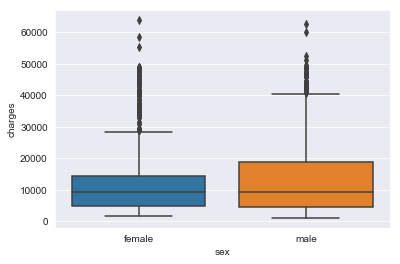

男性的平均保费高于女性，女性中多数的保费集中在25000以下，而男性则分布在35000以下，是什么导致男性的保费高于女性呢？


In [5]:
sns.boxplot(y='charges',data=data,x='sex')
plt.show()

print('男性的平均保费高于女性，女性中多数的保费集中在25000以下，而男性则分布在35000以下，是什么导致男性的保费高于女性呢？')

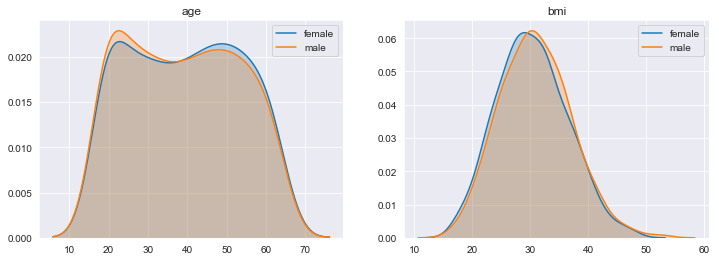

男女的年龄和bmi差异不大，男性在20岁左右的人数略大于女性，在50岁左右略小于女性，男性的bmi略高于女性，但均未表现出显著性差异，所以并非年龄和bmi差异导致保费的增加


In [6]:
cols = ['age','bmi']
sex = ['female','male']
fig,ax = plt.subplots(1,2,figsize=(12,4))
for col,p in zip(cols,range(2)):
    for s in sex:
        sns.kdeplot(data[col][data['sex']==s],label=s,ax=ax[p],shade=True)
        ax[p].set_title(col)
        ax[p].legend()
plt.show()

print('男女的年龄和bmi差异不大，男性在20岁左右的人数略大于女性，在50岁左右略小于女性，男性的bmi略高于女性，但均未表现出显著性差异，所以并非年龄和bmi差异导致保费的增加')

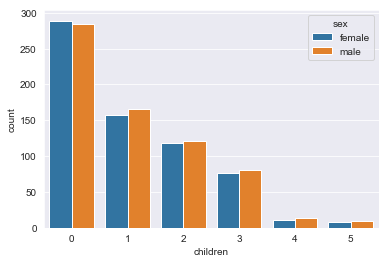

样本并未表现出男性与女性在抚养孩子数量上的差异，孩子数量不是导致保费增加的原因


In [7]:
sns.countplot(data=data,x='children',hue='sex')
plt.show()

print('样本并未表现出男性与女性在抚养孩子数量上的差异，孩子数量不是导致保费增加的原因')

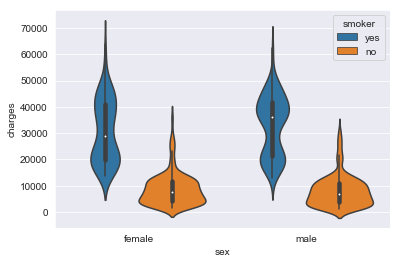

男女性样本中均表现出吸烟者的保费远大于非吸烟者，并且男性吸烟者的人数略大于女性吸烟者，保费金额也相对较高。
可见吸烟是导致保费增加的主要因素之一,那么这些吸烟者有什么特点呢？


In [8]:
plt.figure()
sns.violinplot(data=data,x='sex',y='charges',hue='smoker')
plt.show()

print('男女性样本中均表现出吸烟者的保费远大于非吸烟者，并且男性吸烟者的人数略大于女性吸烟者，保费金额也相对较高。')
print('可见吸烟是导致保费增加的主要因素之一,那么这些吸烟者有什么特点呢？')

## smoker

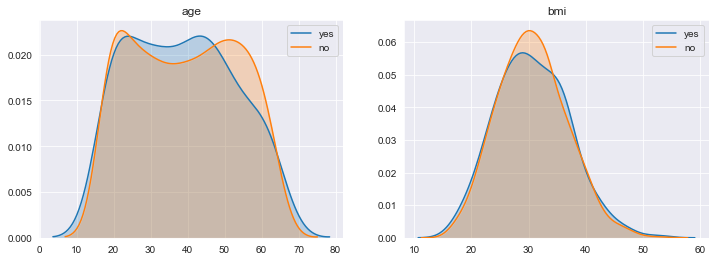

吸烟者的年龄比非吸烟者小5岁左右,bmi并未有明显差异


In [9]:
cols = ['age','bmi']
sex = ['yes','no']
fig,ax = plt.subplots(1,2,figsize=(12,4))
for col,p in zip(cols,range(2)):
    for s in sex:
        sns.kdeplot(data[col][data['smoker']==s],label=s,ax=ax[p],shade=True)
        ax[p].set_title(col)
        ax[p].legend()
plt.show()

print('吸烟者的年龄比非吸烟者小5岁左右,bmi并未有明显差异')

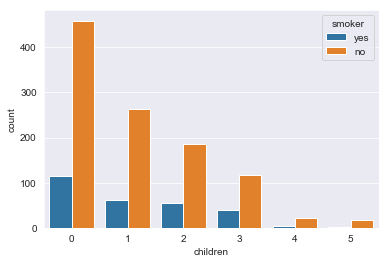

吸烟者抚养儿童的比例很小


In [10]:
sns.countplot(data=data,x='children',hue='smoker')
plt.show()

print('吸烟者抚养儿童的比例很小')

## children

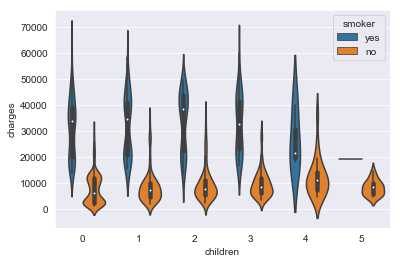

抚养孩子越多保费也就越高
吸烟和抚养儿童数量是导致保费较高的两个原因


In [11]:
sns.violinplot(data=data,x='children',y='charges',hue='smoker',split=False)
plt.show()

print('抚养孩子越多保费也就越高')
print('吸烟和抚养儿童数量是导致保费较高的两个原因')

## region

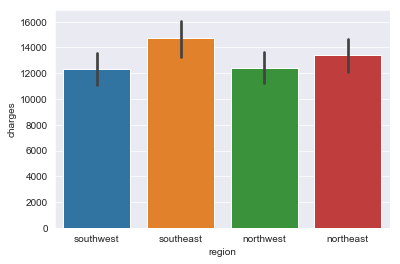

东南方的人均保费大于其余三个地方，其次是东北方，为什么呢？


In [12]:
sns.barplot(data=data,x='region',y='charges')
plt.show()

print('东南方的人均保费大于其余三个地方，其次是东北方，为什么呢？')

抚养孩子数量并未在位置上表现出差异


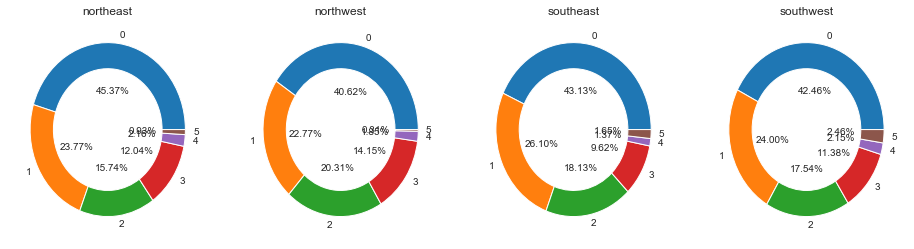

In [13]:
rc = data[['children','region','age']].groupby(['region','children']).count().reset_index()
rc.rename(columns={'age':'count'},inplace=True)

cols = rc['region'].unique().tolist()
fig,axes = plt.subplots(1,4,figsize=(16,4))
for col,p in zip(cols,range(4)):
    axes[p].pie(rc['count'][rc['region']==col],labels=rc['children'][rc['region']==col],autopct='%.2f%%',
               wedgeprops=dict(width=0.3,edgecolor='w'),pctdistance=0.45)
    axes[p].set_title(col)

print('抚养孩子数量并未在位置上表现出差异')

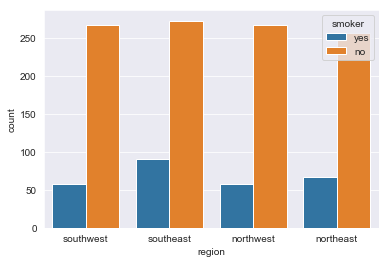

东南方的吸烟人数较多


In [14]:
sns.countplot(x=data['region'],hue=data['smoker'])
plt.show()
print('东南方的吸烟人数较多')

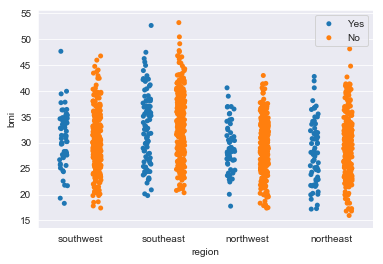

东南方的人的bmi普遍较高


In [9]:
sns.stripplot(data=data,x='region',y='bmi',hue='smoker',split=True)
plt.legend(['Yes','No'])
plt.show()
print('东南方的人的bmi普遍较高')

## BMI

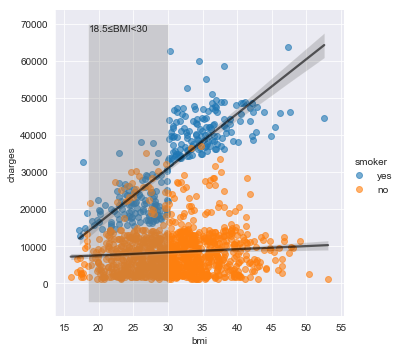

非吸烟者的保费随着BMI的增加而缓慢增长，吸烟者的保费在bmi超过30后陡增


In [46]:
sns.lmplot(data=data,x='bmi',y='charges',hue='smoker',line_kws=dict(color='black',alpha=0.6),scatter_kws=dict(alpha=0.6))
plt.fill_betweenx(x1=18.5,x2=30,y=(-5000,70000),facecolor='gray',alpha=0.3,edgecolor='w')
#plt.axvline(x=18.5,color='black',alpha=0.4)
plt.text(x=18.6,y=68000,s='18.5≤BMI<30')
plt.show()

print('非吸烟者的保费随着BMI的增加而缓慢增长，吸烟者的保费在bmi超过30后陡增')

## age

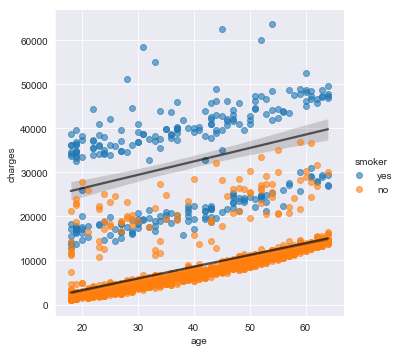

年龄与保费拥有明显的边界，表现出一定的正相关


In [17]:
sns.lmplot(data=data,x='age',y='charges',hue='smoker',line_kws=dict(color='black',alpha=0.6),scatter_kws=dict(alpha=0.6))
plt.show()

print('年龄与保费拥有明显的边界，表现出一定的正相关')

# Model

In [18]:
m_data = data.copy()
m_data['sex'] = m_data['sex'].map({'female':0,'male':1})

m_data['smoker'] = m_data['smoker'].map({'yes':1,'no':0})


m_data = pd.concat([m_data,pd.get_dummies(m_data['region'])],axis=1)
# m_data['region'] = m_data['region'].map({'southwest':1,'northwest':2,'southeast':3,'northeast':4})

del m_data['region']
m_data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


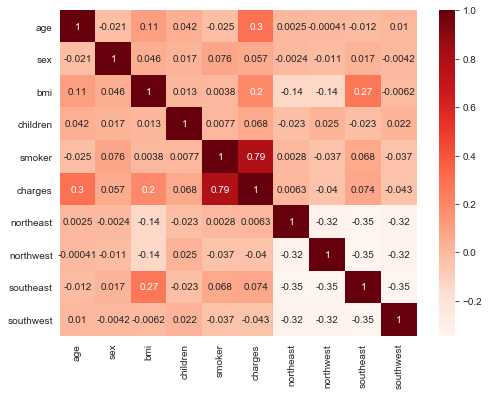

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(m_data.corr(),cmap='Reds',annot=True)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(m_data[['age','sex','bmi','children','smoker','northeast','northwest','southeast','southwest']],m_data['charges'],test_size=0.3)

In [22]:
lre = LinearRegression()
lre.fit(xtrain,ytrain)
lre.score(xtest,ytest)

0.7457688004010667

In [23]:
lre.intercept_,lre.coef_

(-12356.751017311359,
 array([  258.5329742 ,  -324.6870902 ,   329.83368801,   594.72753553,
        24511.07138398,   395.63376647,   309.04075503,  -253.21326491,
         -451.4612566 ]))

max_depth:3, score:0.8285966456792427


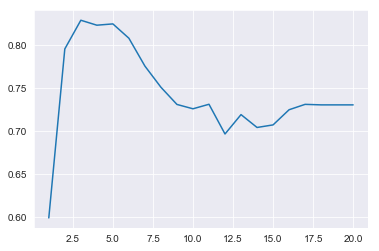

In [24]:
scores = []
for i in range(20):
    dre = DecisionTreeRegressor(criterion='mse',splitter='best',random_state=20,max_depth=i+1)
    dre.fit(xtrain,ytrain)
    scores.append(dre.score(xtest,ytest))

sns.lineplot(x=range(1,21),y=scores)
print('max_depth:{}, score:{}'.format(scores.index(max(scores))+1,max(scores)))

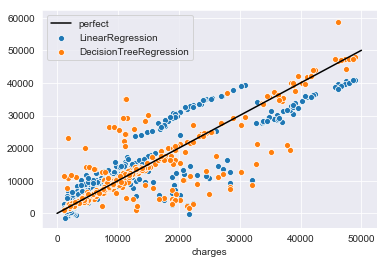

In [26]:
y_lpre = lre.predict(xtest)
y_dpre = dre.predict(xtest)

sns.scatterplot(ytest,y_lpre,label='LinearRegression')
sns.scatterplot(ytest,y_dpre,label='DecisionTreeRegression')
sns.lineplot(x=[0,50000],y=[0,50000],label='perfect',color='black')
plt.legend()